In [1]:
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk import word_tokenize
import re
import os

In [2]:
import pandas as pd

data = pd.read_csv('datasets/IMDB-Dataset.csv')

In [3]:
data.head()
len(data)

50000

In [33]:
# positive reviews
data_pos = data[data['sentiment']=='positive'][0:12500]

In [34]:
data_neg = data[data['sentiment']=='negative'][0:12500]

In [35]:
len(data_pos), len(data_neg)

(12500, 12500)

In [36]:
data_pos.shape

(12500, 2)

In [37]:
all_words = []
documents = []

from nltk.corpus import stopwords

stop_words = list(set(stopwords.words('english')))

# j is adjective, r is adverb, and v is verb
# allowed_word_types = ["J", "R", "V"]
allowed_word_types = ["J"]

# this loop is for positive reviews
for p in data_pos.iterrows():
#     print()
#   create a list of tuples where thr first element of each tuple is a review
#   the second element is the label
    documents.append((p[1][0], 'pos'))
    
#     print('hey')
#   remove punctuations
    cleaned = re.sub(r'[^(a-zA-Z)\s]', '', p[1][0])
    
#   tokenize
    tokenized = word_tokenize(cleaned)
    
#   remove stopwords
    stopped = [w for w in tokenized if not w in stop_words]
    
#   pos_tagging for each word
    pos = nltk.pos_tag(stopped)
    
#   make a list of all adjectives identified by the allowed word types list above
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())


In [38]:
# for negative reviews
for p in data_neg.iterrows():
    documents.append((p[1][0], 'pos'))
    cleaned = re.sub(r'[^(a-zA-Z)\s]', '', p[1][0])
    tokenized = word_tokenize(cleaned)
    stopped = [w for w in tokenized if not w in stop_words]
    pos = nltk.pos_tag(stopped)
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())

In [39]:
# creating a frequency distribution of each adjectives.
all_words_freq = nltk.FreqDist(all_words)
len(all_words_freq)

29693

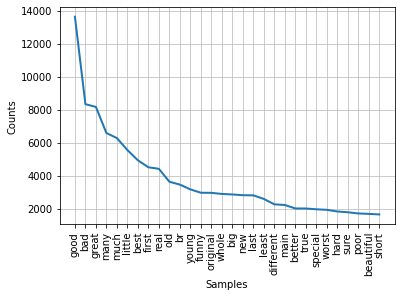

In [40]:
import matplotlib.pyplot as plt
all_words_freq.plot(30, cumulative=False)
plt.show()

In [41]:
word_features = list(all_words_freq.keys())
# documents

In [42]:
# words = word_tokenize(documents[0])

In [ ]:
# function to create a disctionary of features for each review in the list document
# the keys are the words in word_features
# the values of each key are either True or False for wether that feature appears in the review or not

def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features

# creating features for each review
featuresets = [(find_features(rev), category) for (rev, category) in documents]

# Shuffling the documents
random.shuffle(featuresets)

# training_set = featuresets[:800]
# testing_set = featuresets[800:]

In [32]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

print("Classifier accuracy present:", (nltk.classify.accuracy(classifier, testing_set))*100)

print(classifier.most_informative_features(15))

Classifier accuracy present: 100.0
Most Informative Features
